# Import the necessary libraries

In [149]:
# Import libraries
import numpy as np
import mglearn
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing .image import ImageDataGenerator

# Image Data Preprocessing

In [150]:
# Train dataset preprocessing
# Create an instance of an image data generator using Keras API
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [151]:
#Use the image data generator to process the trainig set images using the flow_from directory
train_set_data = train_datagen.flow_from_directory(
        'train_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 2440 images belonging to 3 classes.


In [152]:
# Test dataset preprocessing
test_datagen = ImageDataGenerator(rescale=1./255)
test_set_data = train_datagen.flow_from_directory(
        'test_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical')

Found 600 images belonging to 3 classes.


# Building CNN model to extract the features

In [153]:
# Create an instance of the convolutional neural network model (in this case sequential)
cnn =tf.keras.models.Sequential()
#Build the Convolution Layer
#Add a hidden layer to neural network
cnn.add(tf.keras.layers.Conv2D(filters = 64, kernel_size =3,padding='same',activation ='relu', input_shape=[128,128,3]))
# Add the pooling layer
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2))
#Add two more layers
cnn.add(tf.keras.layers.Conv2D(filters = 32, kernel_size =3,padding='same',activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2))
#Add two more layers
cnn.add(tf.keras.layers.Conv2D(filters = 16, kernel_size =3,padding='same',activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2))
#Add two more layers
cnn.add(tf.keras.layers.Conv2D(filters = 8, kernel_size =3,padding='same',activation ='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size =2, strides = 2))
# Add the fully connected layer
cnn.add(tf.keras.layers.Flatten())

# Feed the Features into an Artificial Neural Network

In [154]:
# Now feed the features into an artificial neural network
# hidden layer of the artificial neural network
cnn.add(tf.keras.layers.Dense(units=96, activation ='relu'))
cnn.add(tf.keras.layers.Dropout(0.2))
# connect the hidden layer to the output layer
cnn.add(tf.keras.layers.Dense(units=3,activation ='softmax'))

In [155]:
adam =tf.keras.optimizers.Adam(learning_rate=0.001,epsilon=10e-8,)

In [156]:
# compile the result
cnn.compile(optimizer =adam, loss='categorical_crossentropy', metrics =['accuracy'])

In [157]:
cnn.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 16, 16, 16)      

In [158]:
# fit the model
history=cnn.fit(x=train_set_data, validation_data =test_set_data, epochs=100,batch_size =32)

Epoch 1/100
77/77 [==============================] - 65s 797ms/step - loss: 0.9520 - accuracy: 0.4988 - val_loss: 0.8195 - val_accuracy: 0.5883
Epoch 2/100
77/77 [==============================] - 59s 768ms/step - loss: 0.7796 - accuracy: 0.6135 - val_loss: 0.7850 - val_accuracy: 0.5717
Epoch 3/100
77/77 [==============================] - 61s 793ms/step - loss: 0.7251 - accuracy: 0.6242 - val_loss: 0.7370 - val_accuracy: 0.6167
Epoch 4/100
77/77 [==============================] - 62s 804ms/step - loss: 0.6799 - accuracy: 0.6611 - val_loss: 0.6772 - val_accuracy: 0.6717
Epoch 5/100
77/77 [==============================] - 61s 791ms/step - loss: 0.6409 - accuracy: 0.6824 - val_loss: 0.6182 - val_accuracy: 0.7067
Epoch 6/100
77/77 [==============================] - 61s 795ms/step - loss: 0.6243 - accuracy: 0.6885 - val_loss: 0.6646 - val_accuracy: 0.6550
Epoch 7/100
77/77 [==============================] - 61s 789ms/step - loss: 0.5976 - accuracy: 0.7061 - val_loss: 0.6457 - val_accuracy:

# Extracted Feature Visualization

In [8]:
feature_model =tf.keras.models.load_model("512 extracted features")

In [9]:
# Use the model to extract features of the train set image data
train_features_extractor =feature_model.predict(train_set_data)

77/77 [==============================] - 31s 401ms/step


In [10]:
# Reshape the train set feature data
train_features=train_features_extractor.reshape(train_features_extractor.shape[0],-1)

In [11]:
# Use the model to extract features of the test set image data
test_features_extractor =feature_model.predict(test_set_data)

19/19 [==============================] - 8s 403ms/step


In [12]:
# Reshape the test set feature data
test_features=test_features_extractor.reshape(test_features_extractor.shape[0],-1)

In [13]:
from sklearn.cluster import AgglomerativeClustering
# Train a clustering algorithm on the training data and get the cluster labels
clusterer = AgglomerativeClustering(n_clusters=3)
cluster_labels = clusterer.fit_predict(train_features)
cluster_labels 

array([2, 0, 1, ..., 0, 0, 1], dtype=int64)

Text(0, 0.5, 'Cum Variance')

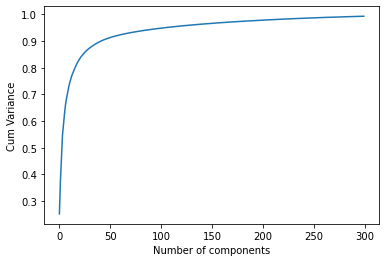

In [16]:
from sklearn.decomposition import PCA
# Use the principal component analysis to reduce the
# dimensionality of the features
pca_train =PCA(n_components =300)
pca_train.fit(train_features)
plt.plot(np.cumsum(pca_train.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Cum Variance")

In [17]:
# Reduce the dimension of the features to two components
n_pca_components =2
pca=PCA(n_components=n_pca_components)
train_PCA=pca.fit_transform(train_features)
test_PCA=pca.transform(test_features)
train_PCA.shape

(2440, 2)

In [18]:
from sklearn.cluster import AgglomerativeClustering
# Train a clustering algorithm on the training data and get the cluster labels
clusterer = AgglomerativeClustering(n_clusters=3)
cluster_labels = clusterer.fit_predict(train_PCA)

In [43]:
# A wrapper function for calling motplotlib's scatter graph.
def plot_scatter(X, color, alpha=0.5):
    return plt.scatter(X[:, 0], X[:, 1], c=color, alpha=alpha, edgecolor="k")

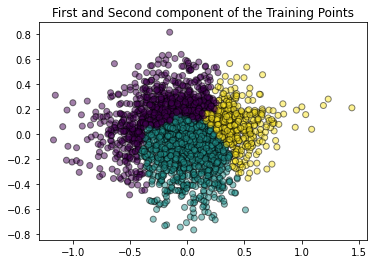

In [47]:
# Plot the Training points
plt.figure(figsize=(20, 4))
plt.subplot(131)
plot_scatter(train_PCA, cluster_labels)
plt.title("First and Second component of the Training Points");

# View the output of the first Convolution layer of the CNN¶


In [50]:
# Create a visualisation Model
# summarize filter shapes
for layer in cnn.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
 # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d (3, 3, 3, 64)
conv2d_1 (3, 3, 64, 32)
conv2d_2 (3, 3, 32, 16)
conv2d_3 (3, 3, 16, 8)


In [51]:
# retrieve weights from the second hidden layer
filters, biases =cnn.layers[0].get_weights()

# plotting the first six filters from the first hidden convolutional layer¶

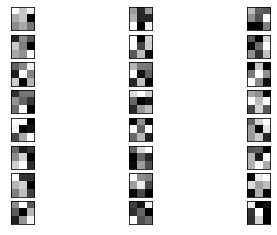

In [53]:
# one row for each filter and one column for each channel
# plot first few filters
n_filters, ix = 8, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1

In [219]:
#cnn.save("model_anirecog_30epoch_adamlr0.0173.83%")

INFO:tensorflow:Assets written to: model_anirecog_30epoch_adamlr0.0173.83%\assets


INFO:tensorflow:Assets written to: model_anirecog_30epoch_adamlr0.0173.83%\assets


# Evaluate Model

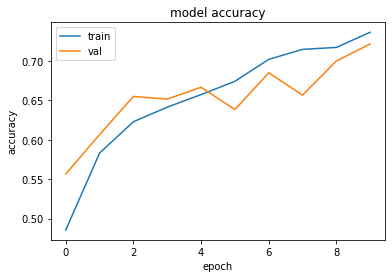

In [103]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'][0:10])
plt.plot(history.history['val_accuracy'][0:10])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

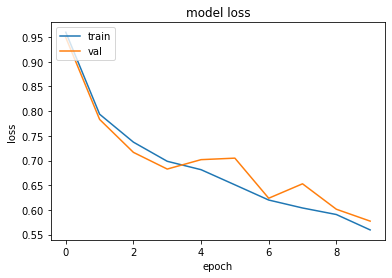

In [104]:
plt.plot(history.history['loss'][0:10])
plt.plot(history.history['val_loss'][0:10])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [204]:
train_set_data.class_indices

{'cat': 0, 'dog': 1, 'panda': 2}

# Test Model

In [335]:
#my_model =tf.keras.models.load_model("model_anirecog_30epoch_adamlr0.0173.83%")

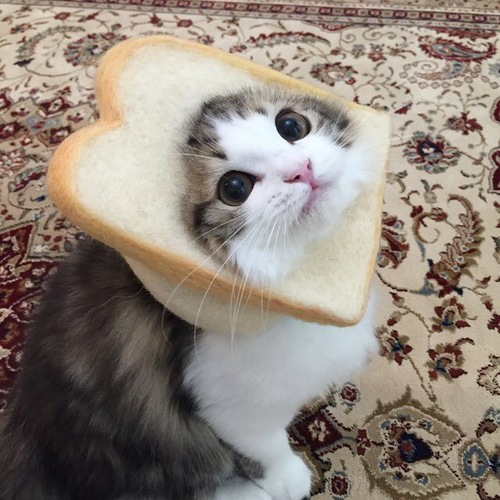

In [126]:
tf.keras.utils.load_img(
    path ='cat.jpg',
    grayscale=False,
    color_mode="rgb",
    target_size=None,
    interpolation="nearest",
    keep_aspect_ratio=False,
)

In [75]:
def interpret_result(output):
    if np.argmax(output)==0:
        print('It\'s a cat!' )
    elif np.argmax(output)==1:
        print('It\'s a dog!')
    else:
        print('It\'s a panda!')
    

In [127]:
# predict on image the model haven't seen
# Preprocessing new image
test_image =tf.keras.preprocessing. image.load_img('cat.jpg',target_size=(128,128))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.array([test_image]) # convert single image to a batch
result =cnn.predict(test_image)
print(result)
print(np.argmax(result))
interpret_result(result)

1/1 [==============================] - 0s 39ms/step
[[0. 1. 0.]]
1
It's a dog!


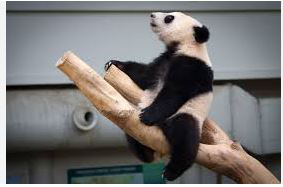

In [133]:
tf.keras.utils.load_img(
    path ='panda_2.jpg',
    grayscale=False,
    color_mode="rgb",
    target_size=None,
    interpolation="nearest",
    keep_aspect_ratio=False,
)

In [134]:
# predict on image the model haven't seen
# Preprocessing new image
test_image =tf.keras.preprocessing. image.load_img('panda_2.jpg',target_size=(128,128))
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
test_image = np.array([test_image]) # convert single image to a batch
result =cnn.predict(test_image)
print(result)
interpret_result(result)

1/1 [==============================] - 0s 47ms/step
[[0. 0. 1.]]
It's a panda!


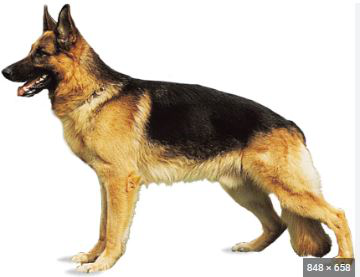

In [130]:
tf.keras.utils.load_img(
    path ='dog_3.jpg',
    grayscale=False,
    color_mode="rgb",
    target_size=None,
    interpolation="nearest",
    keep_aspect_ratio=False,
)

In [131]:
# predict on image the model haven't seen
# Preprocessing new image
# load the image for prediction
test_image =tf.keras.preprocessing. image.load_img('dog_3.jpg',target_size=(128,128))
#Convert image to  array
test_image = tf.keras.preprocessing.image.img_to_array(test_image)
# convert single image to a batch
test_image = np.array([test_image]) 
result =cnn.predict(test_image)
print(result)
interpret_result(result)

1/1 [==============================] - 0s 35ms/step
[[0. 1. 0.]]
It's a dog!


# To learn what the model has learned

In [267]:
my_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 128, 128, 64)      1792      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 64, 64, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 16)        4624      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 16)      

In [268]:
# Get list of layers from the model
layer_outputs=[layer.output for layer in my_model.layers[:]]

In [269]:
layer_outputs

[<KerasTensor: shape=(None, 128, 128, 64) dtype=float32 (created by layer 'conv2d_15')>,
 <KerasTensor: shape=(None, 64, 64, 64) dtype=float32 (created by layer 'max_pooling2d_15')>,
 <KerasTensor: shape=(None, 64, 64, 32) dtype=float32 (created by layer 'conv2d_16')>,
 <KerasTensor: shape=(None, 32, 32, 32) dtype=float32 (created by layer 'max_pooling2d_16')>,
 <KerasTensor: shape=(None, 32, 32, 16) dtype=float32 (created by layer 'conv2d_17')>,
 <KerasTensor: shape=(None, 16, 16, 16) dtype=float32 (created by layer 'max_pooling2d_17')>,
 <KerasTensor: shape=(None, 16, 16, 8) dtype=float32 (created by layer 'conv2d_18')>,
 <KerasTensor: shape=(None, 8, 8, 8) dtype=float32 (created by layer 'max_pooling2d_18')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'flatten_4')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dense_18')>,
 <KerasTensor: shape=(None, 128) dtype=float32 (created by layer 'dropout_8')>,
 <KerasTensor: shape=(None, 3) dtype=fl

In [270]:
# Create a visualisation Model
# summarize filter shapes
for layer in my_model.layers:
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
 # get filter weights
    filters, biases = layer.get_weights()
    print(layer.name, filters.shape)

conv2d_15 (3, 3, 3, 64)
conv2d_16 (3, 3, 64, 32)
conv2d_17 (3, 3, 32, 16)
conv2d_18 (3, 3, 16, 8)


In [271]:
# retrieve weights from the first hidden layer
filters, biases =my_model.layers[0].get_weights()

In [272]:
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

# plotting the first six filters from the first hidden convolutional layer

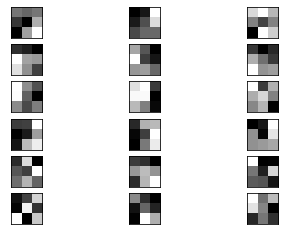

In [273]:
# one row for each filter and one column for each channel
# plot first few filters
n_filters, ix = 6, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 3, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j], cmap='gray')
        ix += 1

In [54]:
# summarize feature map shapes
for i in range(len(my_model.layers)):
    layer = my_model.layers[i]
    if 'conv' not in layer.name:
        continue
     # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d (None, 128, 128, 64)
2 conv2d_1 (None, 64, 64, 32)
4 conv2d_2 (None, 32, 32, 16)


In [276]:
# redefine model to output right after the first hidden layer
model =tf.keras.models.Model(inputs=my_model.inputs, outputs=my_model.layers[1].output)

In [369]:
#Making a prediction with this model will give the feature map for the first 
#convolutional layer for a given provided input image.
img =tf.keras.preprocessing. image.load_img('panda_3.jpg',target_size=(128,128))
img = tf.keras.preprocessing.image.img_to_array(img)
img.shape                                           

(128, 128, 3)

In [370]:
img=img.reshape(1,128, 128, 3)
img.shape

(1, 128, 128, 3)

In [371]:
# Rescale the image
img=img/255

In [372]:
# get feature map for first hidden layer
feature_maps = model.predict(img)

1/1 [==============================] - 0s 67ms/step


In [373]:
print(len(feature_maps))

1


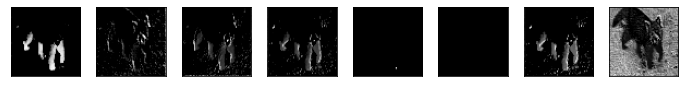

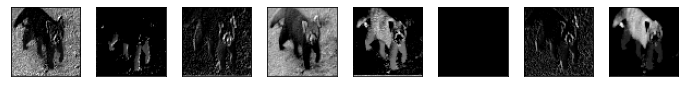

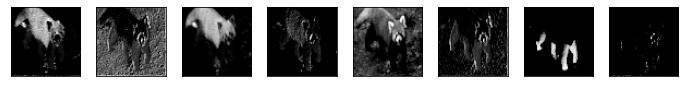

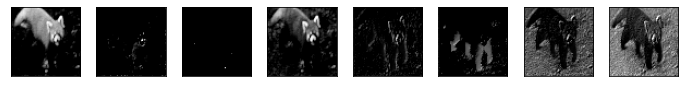

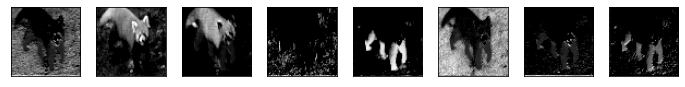

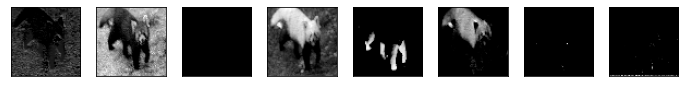

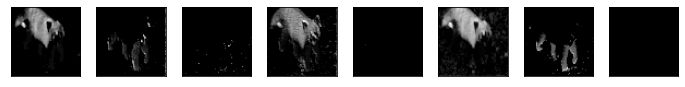

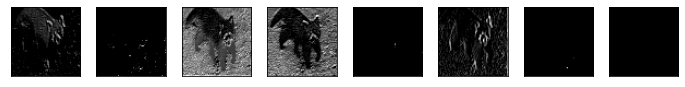

In [374]:
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    fig=plt.figure(figsize=(12,12))
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')
        ix += 1
        # show the figure
    plt.show()